In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [ ]:
df.sample(5)

In [ ]:
df.shape

1. Data Clening


In [ ]:
df.info()

In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.sample(5)

In [ ]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

0 = ham ,
1 = spam 

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()
df.shape

2.EDA


In [ ]:
df.head()

In [ ]:
df['target'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
import nltk

In [ ]:
# nltk.download('punkt_tab')
import nltk
import os

# Set download directory to your current project folder
nltk_data_dir = os.path.join(os.getcwd(), 'nltk_data')
nltk.data.path.append(nltk_data_dir)

# Download stopwords to your project folder
nltk.download('stopwords', download_dir=nltk_data_dir)
nltk.download('punkt_tab', download_dir=nltk_data_dir)

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head()

In [ ]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

In [ ]:
#ham
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

In [ ]:
#spam
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

In [ ]:
import seaborn as sns

In [ ]:
sns.histplot(df[df['target']==0]['num_characters'], color='green')
sns.histplot(df[df['target']==1]['num_characters'], color='red')

In [ ]:
sns.histplot(df[df['target']==0]['num_words'], color='green')
sns.histplot(df[df['target']==1]['num_words'], color='red')

In [ ]:
sns.pairplot(df, hue='target')

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

3. Data Preprocessing

In [ ]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    #remove special characters
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    # remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
     # stemming
    for i in text:
        y.append(ps.stem(i)) 

    return " ".join(y)

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
from wordcloud import WordCloud
wc= WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

In [ ]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [70]:
spam_corpus=[]
for msg in df[df['target']==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [72]:
len(spam_corpus)

9939

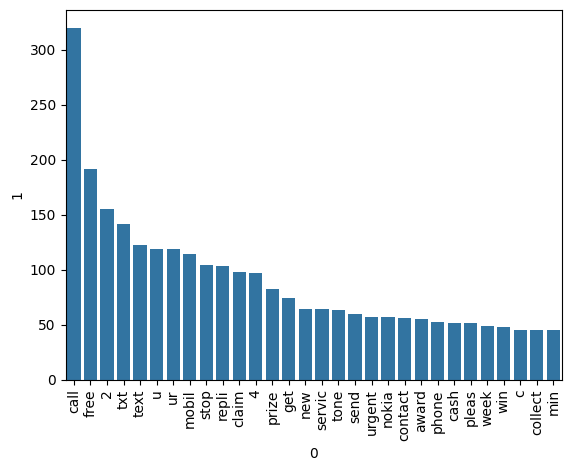

In [79]:
from collections import Counter
spam_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=spam_words_df[0], y=spam_words_df[1])
plt.xticks(rotation='vertical')
plt.show()